In [298]:
import tensorflow as tf
from tensorflow.core.util import event_pb2
import matplotlib.pyplot as plt
import sys, os, string
import numpy
from matplotlib.pyplot import figure
import collections
import seaborn

In [299]:

def my_mean(li):
    min_index = numpy.min([len(l) for l in li])
    _li = [l[0:min_index] for l in li]
    return numpy.mean(_li,axis=0)

def smooth(y, win = 5):
    if len(y) > win:
        yhat = [numpy.mean(y[max([0,x-win]):min([x+win,200])]) for x in range(len(y))]
        return yhat
    return y

def var(y, win = 10):
    if len(y) > win:
        yhat = [numpy.std(y[max([0,x-win]):min([x+win,200])]) for x in range(win,len(y)-win)]
        return yhat
    return y

def delta(y):
    ll=10
    yhat = [numpy.max(y[x:x+ll])-numpy.min(y[x:x+ll]) for x in range(len(y)-ll)]
    return yhat


In [300]:
# load tensorboard file and return a sequence of rewards
def load_rewards(result_path):
    # init list
    reward_list = []

    # load data
    prev_step = -1
    data = tf.data.TFRecordDataset(result_path)
    for i, serialized_example in enumerate(data):
        event = event_pb2.Event.FromString(serialized_example.numpy())
        for value in event.summary.value:
            if value.tag == "Eval/AverageReturns":
            #if value.tag == "Train/Loss":
                assert prev_step + 1 == event.step
                prev_step = event.step
                reward_list.append(value.simple_value)

    return reward_list

In [323]:
path = 'results/Neurips_rebuttal'
dic_all = {}
li = os.listdir(path)
#print(li)
for l in li:
    if '.DS_Store' in l:
        continue
    game = l.split("_")[1]
    if game not in dic_all.keys():
        dic_all[game] = {}
    else:
        pass
    alg = l.split("_")[2:-1]
    alg = "-".join(alg)
    temp = path + '/' + l
    try:
        temp = temp + '/' + os.listdir(temp)[0]
        temp = load_rewards(temp)
        if alg not in dic_all[game].keys():
            dic_all[game][alg] = [temp]
        else:
            dic_all[game][alg].append(temp)
    except:
        print("problem with {}".format(temp))

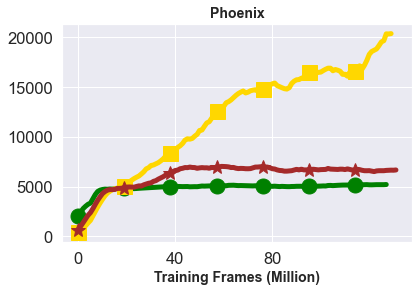

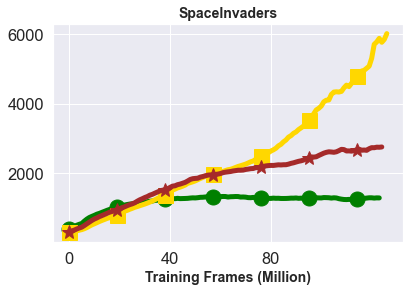

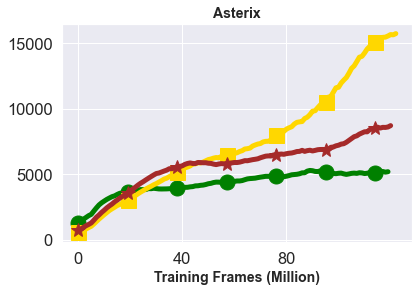

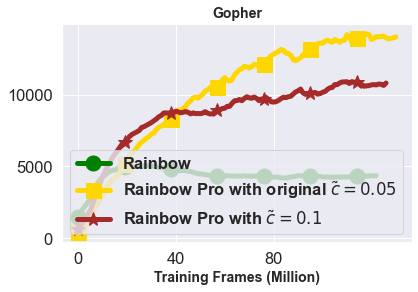

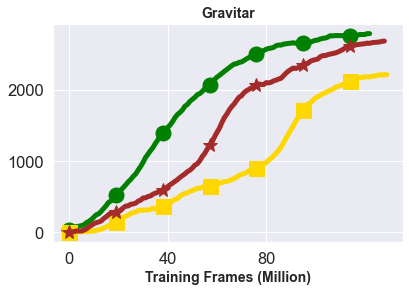

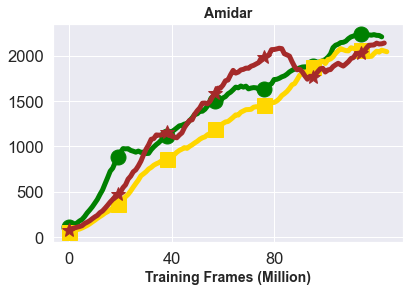

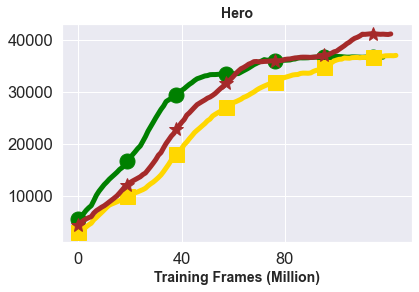

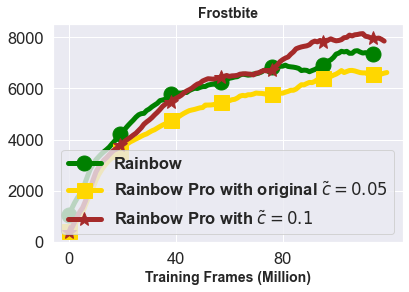

In [324]:
key_order = ['Phoenix', 'SpaceInvaders', 'Asterix', 'WizardOfWor', 'Gopher',
             'Gravitar', 'Amidar', 'PrivateEye', 'Hero', 'Frostbite']
key_order = ['Phoenix','SpaceInvaders', 'Asterix','Gopher',
             'Gravitar', 'Amidar', 'Hero','Frostbite']
alg_li = ['rainbow-c0.0-d0-n3',
          'rainbow-c0.1-d0-n3',
          'rainbow-c0.05-d0-n3']
dic_labels  = {'rainbow-c0.0-d0-n3':'Rainbow', 
               'rainbow-c0.05-d0-n3':'Rainbow Pro with original ' + r'$\tilde c=0.05$', 
               'rainbow-c0.1-d0-n3':'Rainbow Pro with ' + r'$\tilde c=0.1$'}
dic_colors  = {'rainbow-c0.0-d0-n3':'green', 
               'rainbow-c0.05-d0-n3':'gold', 
               'rainbow-c0.1-d0-n3':'brown'}
dic_markers = {'rainbow-c0.0-d0-n3':'o', 
               'rainbow-c0.05-d0-n3':'s', 
               'rainbow-c0.1-d0-n3':'*'}
#print(agents)
#assert False
dic_all = {k : dic_all[k] for k in key_order}
for domain_index, domain in enumerate(dic_all.keys()):
    fig, ax = plt.subplots()
    # ...
    fig.tight_layout()
    #figure(figsize=(6, 4), dpi=80)
    seaborn.set(style="darkgrid", font_scale=1.5)
    od = collections.OrderedDict(sorted(dic_all[domain].items()))
    for alg in od.keys():
        if alg in alg_li:
            plt.plot(smooth(my_mean(od[alg])), 
                     lw=5, 
                     label = dic_labels[alg],
                     color = dic_colors[alg],
                     marker= dic_markers[alg],
                     markevery = 19,
                     markersize = 15)
    if domain_index + 1 == len(dic_all) or domain_index + 1 == len(dic_all)/2:
        legend_properties = {'weight':'bold'}
        plt.legend(prop=legend_properties, fontsize=14,loc = 'lower right')
    plt.title(domain, fontsize=14,weight='bold')
    plt.xticks([0,40,80])
    plt.xlabel("Training Frames (Million)", fontsize=14,weight='bold')
    #figure(bottom=0.2)
    plt.savefig("images/Neurips_rebuttal/{}.pdf".format(domain))
    
    plt.show()
    
    